<a href="https://colab.research.google.com/github/GangaMegha/Digital-Image-Processsing/blob/main/Image_Restoration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The lab document and images can be found at : https://cabouman.github.io/grad_labs/Image-Restoration/index.html

The colab notebook is available at : https://github.com/GangaMegha/Digital-Image-Processsing/blob/main/Image_Restoration.ipynb

# 1. Minimum Mean Square Error (MMSE) Linear Filters

In [1]:
# Download input image
!wget https://cabouman.github.io/grad_labs/data/images-restoration.zip
!unzip -qq images-restoration.zip
!rm -r images-restoration.zip

--2022-04-28 05:23:04--  https://cabouman.github.io/grad_labs/data/images-restoration.zip
Resolving cabouman.github.io (cabouman.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to cabouman.github.io (cabouman.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1108219 (1.1M) [application/zip]
Saving to: ‘images-restoration.zip’

images-restoration. 100%[===================>]   1.06M  --.-KB/s    in 0.03s   

2022-04-28 05:23:04 (41.1 MB/s) - ‘images-restoration.zip’ saved [1108219/1108219]



In [2]:
import numpy as np
from PIL import Image

# Read Images
img14g  = Image.open("img14g.tif")
img14bl = Image.open("img14bl.tif")
img14gn = Image.open("img14gn.tif")
img14sp = Image.open("img14sp.tif")

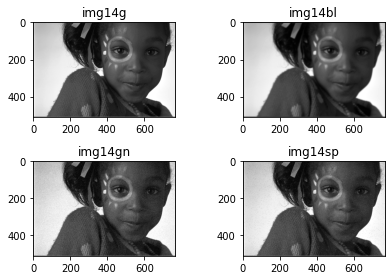

In [3]:
import matplotlib.pyplot as plt

# Display Images
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0,0].imshow(img14g, "gray")
ax[0,0].set_title("img14g")
ax[0,1].imshow(img14bl, "gray")
ax[0,1].set_title("img14bl")
ax[1,0].imshow(img14gn, "gray")
ax[1,0].set_title("img14gn")
ax[1,1].imshow(img14sp, "gray")
ax[1,1].set_title("img14sp")
plt.tight_layout()

### Blurred Image : img14bl

In [4]:
Y = np.array(img14g).astype(float)
X = np.array(img14bl).astype(float)

# Compute Z matrix
Z = []
y = []
s = 20
k = 7 # Window size
ks = k//2

N = X.shape[0]
M = X.shape[1]

for i in range(20, N, s):
  for j in range(20, M, s):
    Z.append(X[i-3:i+4, j-3:j+4].reshape(49))
    y.append(Y[i,j])


Z = np.array(Z)
y = np.array(y)

# Compute estimates of the covariance matrix
Rzz = (Z.T @ Z) / Z.shape[0]
print(Rzz.shape)

# Compute cross correlation
rzy = (Z.T @ y) / Z.shape[0]
print(rzy.shape)

print("Rzz : ", Rzz)
print("rzy : ", rzy)

(49, 49)
(49,)
Rzz :  [[18367.45578947 18364.76315789 18346.89894737 ... 18116.89894737
  18007.79894737 17853.72947368]
 [18364.76315789 18375.18210526 18368.67684211 ... 18143.43368421
  18040.23578947 17890.98      ]
 [18346.89894737 18368.67684211 18373.47684211 ... 18159.35684211
  18063.27578947 17919.86736842]
 ...
 [18116.89894737 18143.43368421 18159.35684211 ... 18199.19052632
  18131.42       18010.36631579]
 [18007.79894737 18040.23578947 18063.27578947 ... 18131.42
  18082.70526316 17981.76210526]
 [17853.72947368 17890.98       17919.86736842 ... 18010.36631579
  17981.76210526 17905.26315789]]
rzy :  [18343.92210526 18373.80210526 18386.99894737 18372.18631579
 18323.25789474 18222.22842105 18065.94947368 18352.34947368
 18381.82105263 18399.10631579 18386.48105263 18335.67894737
 18233.33894737 18077.28736842 18352.66105263 18384.21052632
 18402.60210526 18390.65157895 18341.59473684 18236.76315789
 18081.24842105 18347.32736842 18379.86421053 18395.66736842
 18386.0673

In [5]:
# Compute the corresponding filter coefficients θ∗
theta = (np.linalg.inv(Rzz) @ rzy).reshape(k,k)
print(theta.shape)
print(theta)

(7, 7)
[[ 1.52077847 -1.68334415 -0.01470553  0.99925446 -0.22061327  0.06709987
   0.56721854]
 [-0.21965959 -1.31170747 -0.35522001 -0.44070398 -1.13948342 -0.40670626
  -0.43018349]
 [ 1.34146166 -0.97000061  0.71950542  2.38605037  0.6887928  -1.11641599
   0.4173528 ]
 [-1.17544225 -0.03609406  1.24835338  1.89662332  0.52307269 -0.64130652
  -0.35914587]
 [ 0.32864453 -0.87344021  0.13845858  0.98663353  0.44027126 -1.1208038
   0.73296795]
 [-0.57797679 -0.74018757  0.55932199  0.10562812 -0.63603457 -2.11777812
   1.33494943]
 [ 1.08636788 -0.81388456  0.28325204 -0.96834083  1.04740942 -0.02050305
  -0.03075889]]


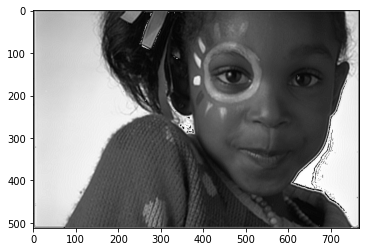

In [6]:
from scipy.signal import convolve2d

out = convolve2d(X, theta, mode="same")
im = Image.fromarray(out.astype(np.uint8))
im.save("img14bl_out.tif", "tiff")
plt.imshow(im, "gray")

### Noisy Image : img14gn

In [7]:
Y = np.array(img14g).astype(float)
X = np.array(img14gn).astype(float)

# Compute Z matrix
Z = []
y = []
s = 20
k = 7 # Window size
ks = k//2

N = X.shape[0]
M = X.shape[1]

for i in range(20, N, s):
  for j in range(20, M, s):
    Z.append(X[i-3:i+4, j-3:j+4].reshape(49))
    y.append(Y[i,j])


Z = np.array(Z)
y = np.array(y)

# Compute estimates of the covariance matrix
Rzz = (Z.T @ Z) / Z.shape[0]
print(Rzz.shape)

# Compute cross correlation
rzy = (Z.T @ y) / Z.shape[0]
print(rzy.shape)

print("Rzz : ", Rzz)
print("rzy : ", rzy)

(49, 49)
(49,)
Rzz :  [[18356.21157895 18193.50526316 18080.75684211 ... 18015.10842105
  17842.45052632 17924.22842105]
 [18193.50526316 18589.42842105 18272.96105263 ... 18152.05263158
  18003.16842105 18091.97263158]
 [18080.75684211 18272.96105263 18550.14315789 ... 18143.05789474
  17992.24842105 18064.85894737]
 ...
 [18015.10842105 18152.05263158 18143.05789474 ... 18786.64736842
  18352.18526316 18422.18736842]
 [17842.45052632 18003.16842105 17992.24842105 ... 18352.18526316
  18535.21684211 18401.53052632]
 [17924.22842105 18091.97263158 18064.85894737 ... 18422.18736842
  18401.53052632 18837.80421053]]
rzy :  [18162.04210526 18303.51789474 18316.94210526 18421.65368421
 18450.20210526 18385.73789474 18421.24       18283.56
 18355.52842105 18516.06315789 18477.34315789 18389.92
 18243.63263158 18390.58947368 18177.62947368 18373.03157895
 18470.94315789 18441.84526316 18316.39052632 18285.69684211
 18225.89684211 18294.89473684 18349.03473684 18353.34315789
 18276.55578947 1

In [8]:
# Compute the corresponding filter coefficients θ∗
theta = (np.linalg.inv(Rzz) @ rzy).reshape(k,k)
print(theta.shape)
print(theta)

(7, 7)
[[-0.01064679 -0.00878248 -0.00785871  0.03652983  0.03588477  0.01149822
   0.00347734]
 [ 0.03537147  0.00346609  0.01106458  0.04051956  0.04606868 -0.0168698
  -0.00159275]
 [-0.01844371  0.02137353  0.0656949   0.09632869  0.03371447 -0.01886859
  -0.02013767]
 [-0.01057593  0.00430173  0.10154427  0.19908836  0.07168439  0.01551672
  -0.00151856]
 [-0.00038936  0.04068169  0.03707952  0.08505287  0.03326219  0.00696487
   0.01191204]
 [-0.02853707  0.01278258  0.02583291  0.01794279  0.00189297  0.02498127
  -0.01053779]
 [-0.0283828   0.00074271  0.01642021  0.0119555   0.01168785  0.0066041
   0.01016106]]


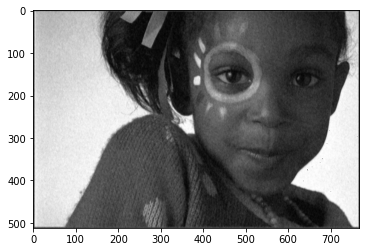

In [9]:
from scipy.signal import convolve2d

out = convolve2d(X, theta, mode="same")
im = Image.fromarray(out.astype(np.uint8))
im.save("img14gn_out.tif", "tiff")
plt.imshow(im, "gray")

### Noisy Image : img14sp

In [10]:
Y = np.array(img14g).astype(float)
X = np.array(img14sp).astype(float)

# Compute Z matrix
Z = []
y = []
s = 20
k = 7 # Window size
ks = k//2

N = X.shape[0]
M = X.shape[1]

for i in range(20, N, s):
  for j in range(20, M, s):
    Z.append(X[i-3:i+4, j-3:j+4].reshape(49))
    y.append(Y[i,j])


Z = np.array(Z)
y = np.array(y)

# Compute estimates of the covariance matrix
Rzz = (Z.T @ Z) / Z.shape[0]
print(Rzz.shape)

# Compute cross correlation
rzy = (Z.T @ y) / Z.shape[0]
print(rzy.shape)

print("Rzz : ", Rzz)
print("rzy : ", rzy)

(49, 49)
(49,)
Rzz :  [[18628.74210526 18413.87789474 18233.40842105 ... 18219.03368421
  18089.07789474 18094.81052632]
 [18413.87789474 18596.00421053 18350.21894737 ... 18249.84526316
  18165.47473684 18166.67368421]
 [18233.40842105 18350.21894737 18516.66315789 ... 18148.78210526
  18070.96736842 18060.51052632]
 ...
 [18219.03368421 18249.84526316 18148.78210526 ... 18754.48105263
  18486.14842105 18468.06736842]
 [18089.07789474 18165.47473684 18070.96736842 ... 18486.14842105
  18723.82210526 18499.        ]
 [18094.81052632 18166.67368421 18060.51052632 ... 18468.06736842
  18499.         18818.36210526]]
rzy :  [18349.87684211 18377.62842105 18313.68526316 18368.07157895
 18392.45684211 18379.47263158 18347.63368421 18399.39263158
 18442.54947368 18532.37684211 18371.84315789 18464.55789474
 18453.89894737 18417.94       18198.74315789 18450.73052632
 18557.22526316 18542.46315789 18414.72315789 18335.13368421
 18482.90842105 18280.89473684 18430.94105263 18443.39894737
 1845

In [11]:
# Compute the corresponding filter coefficients θ∗
theta = (np.linalg.inv(Rzz) @ rzy).reshape(k,k)
print(theta.shape)
print(theta)

(7, 7)
[[ 2.56095008e-02 -3.53072936e-02  2.53969487e-02  4.34553072e-02
   4.62636058e-02  5.03826473e-03 -1.29385713e-04]
 [ 2.32234398e-02  4.76019769e-03 -2.84236262e-03  2.36041657e-02
   3.70025979e-02 -1.41997791e-02 -2.34652596e-03]
 [-1.46019926e-03 -1.71623187e-02  6.91932695e-02  1.28875457e-01
   5.94915472e-03 -1.69516546e-02 -7.74036630e-03]
 [ 1.77067176e-02 -1.23008553e-02  7.86411409e-02  1.83431176e-01
   8.58602780e-02 -6.29500576e-03  7.41181711e-03]
 [-1.05863806e-02  2.92631012e-02  5.72837979e-02  1.10575905e-01
   6.13136206e-02 -1.10220078e-02  1.42166012e-02]
 [-2.27890686e-02  1.28222553e-02  1.84711174e-02  2.27415319e-02
   2.81308875e-02  1.07955323e-03 -1.97388209e-02]
 [-3.70105746e-02  1.55019572e-02  1.83210853e-02 -1.17677355e-02
  -1.50985930e-03  1.65750027e-02  1.60169838e-02]]


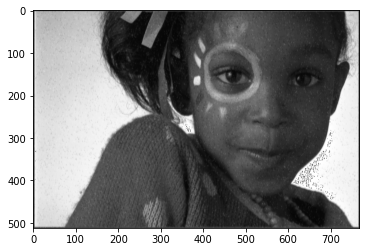

In [12]:
from scipy.signal import convolve2d

out = convolve2d(X, theta, mode="same")
im = Image.fromarray(out.astype(np.uint8))
im.save("img14sp_out.tif", "tiff")
plt.imshow(im, "gray")

# 2. Weighted Median Filtering

In [ ]:
''' C-code '''
#include <math.h>

#include "tiff.h"
#include "allocate.h"
#include "typeutil.h"

void error(char *name);

// A function to implement bubble sort
// From : https://www.geeksforgeeks.org/bubble-sort/
// Modified by Ganga to sort by another array
void swap(unsigned int* xp, unsigned int* yp)
{
    int temp = *xp;
    *xp = *yp;
    *yp = temp;
}

void bubbleSort_arr1_by_arr2(unsigned int arr1[], unsigned int arr2[], int n)
{
    int i, j;
    for (i = 0; i < n - 1; i++)
 
        // Last i elements are already in place
        for (j = 0; j < n - i - 1; j++)
            if (arr2[j] > arr2[j + 1])
            {
                // Swap both arr1 and arr2 based on arr2
                swap(&arr1[j], &arr1[j + 1]);
                swap(&arr2[j], &arr2[j + 1]);
            }
}

int main (int argc, char **argv) 
{
  FILE *fp;
  struct TIFF_img input_img, out_img;
  char* outfile;

  if (argc!=3) error( argv[0] );
  outfile = argv[3];

  /* open image file */ 
  if ( ( fp = fopen ( argv[1], "rb" ) ) == NULL ) 
  {
    fprintf ( stderr, "cannot open file %s\n", argv[1] );
    exit ( 1 );
  }

  if ( read_TIFF ( fp, &input_img ) ) 
  {
    fprintf ( stderr, "error reading file %s\n", argv[1] );
    exit ( 1 );
  }

  /* close image file */
  fclose ( fp );

  /* check the type of image data */
  if ( input_img.TIFF_type != 'g' ) {
    fprintf ( stderr, "error:  image must be 8-bit grayscale\n" );
    exit ( 1 );
  }


  /* Apply Weighted Median Filter to input image */
  get_TIFF(&out_img, input_img.height, input_img.width, 'g');   


  for(int i=0; i<(input_img.height); i++)
		for(int j=0; j<(input_img.width); j++)
    {
      // Weight matrix
      unsigned int W[25] = {1,1,1,1,1,  1,2,2,2,1,  1,2,2,2,1,  1,2,2,2,1,  1,1,1,1,1};
      unsigned int x_small[25];
      int n = sizeof(W) / sizeof(W[0]);

      // Window of sze 5 x 5
      for(int k=0; k<5; k++)
		    for(int l=0; l<5; l++)
          if(i-k>=2 && j-l>=2 && i+k<input_img.height+2 && j+l<input_img.width+2)
            x_small[k*5+l] = input_img.mono[i-k-2][j-l-2];

      // Sorting
      bubbleSort_arr1_by_arr2(W, x_small, n);

      unsigned int sum = 0;
      int k;
      // Median filter
      for(k=0; k<25; k++)
      {
        sum += W[k];
        if(sum>17)
          break;
      }
      out_img.mono[i][j] = x_small[k-1];
    }

  // open output image file 
  if ( ( fp = fopen ( outfile, "wb" ) ) == NULL ) {
    fprintf ( stderr, "cannot open file %s\n", outfile);
    exit ( 1 );
  }

  // write output image 
  if ( write_TIFF ( fp, &out_img ) ) {
    fprintf ( stderr, "error writing TIFF file %s\n", outfile );
    exit ( 1 );
  }

  // close output image file 
  fclose ( fp );
    

  // de-allocate space which was used for the images 
  free_TIFF ( &(input_img) );
  free_TIFF ( &(out_img) );

  return(0);
}

void error(char *name)
{
    printf("usage:  %s  image.tiff \n\n",name);
    printf("this program reads in a 24-bit color TIFF image.\n");
    printf("It then horizontally filters the the image,\n");
    printf("using the specified filter type : \n");
    printf("\t{1 : FIR_low_pass_filter, 2 : FIR_sharpening_filter ,3 : IIR Filter}\n");
    printf("and generates an 8-bit color image,\n");
    printf("that is saved in the output folder");
    exit(1);
}



In [13]:
import numpy as np
from PIL import Image

# Read Images
img14gn_c_out  = Image.open("img14gn_c_out.tif")
img14sp_c_out = Image.open("img14sp_c_out.tif")

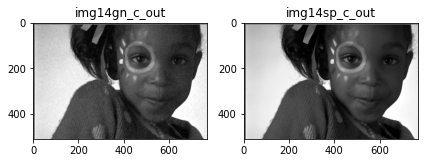

In [14]:
import matplotlib.pyplot as plt

# Display Images
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(img14gn_c_out, "gray")
ax[0].set_title("img14gn_c_out")
ax[1].imshow(img14sp_c_out, "gray")
ax[1].set_title("img14sp_c_out")
plt.tight_layout()